In [2]:
import ast
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\nonst\anaconda3\envs\python_work\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of jobs per job Title

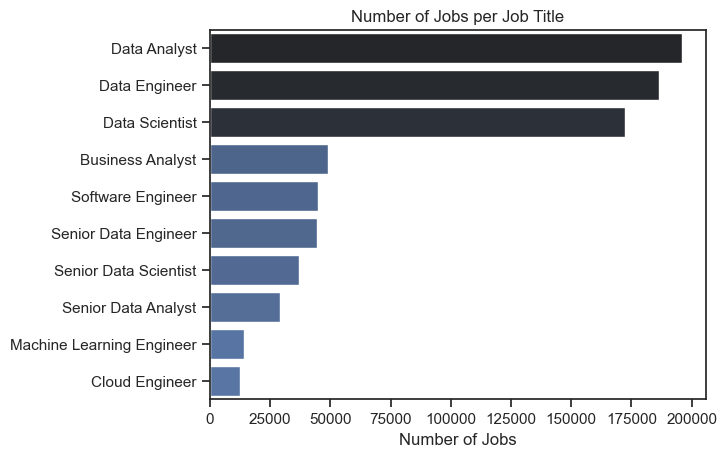

In [3]:
df_plot = df['job_title_short'].value_counts().to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


Jobs by countries

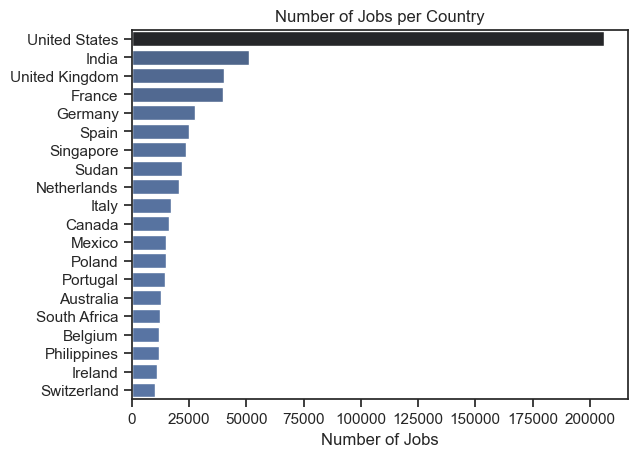

In [4]:
df_countries = df['job_country'].value_counts().to_frame().head(20)
sns.barplot(data = df_countries,x = 'count', y = 'job_country',legend = None,hue='count',palette='dark:b_r')
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


Number of jobs per Company

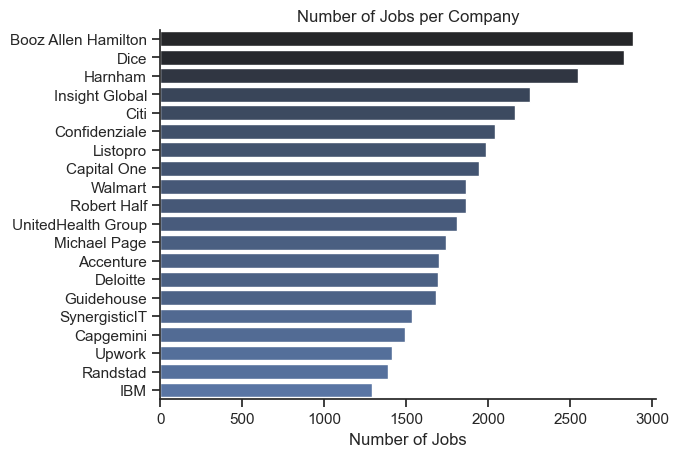

In [5]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

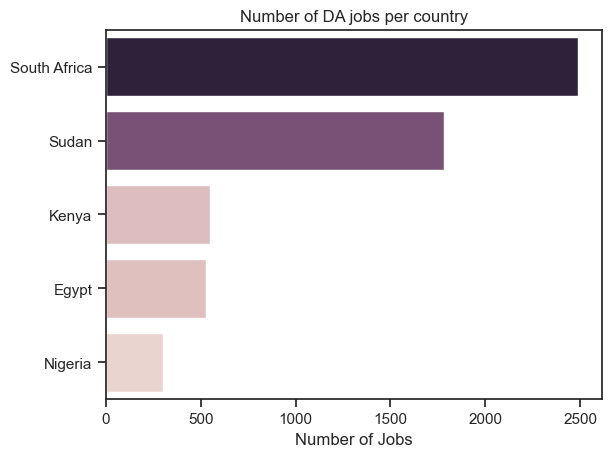

In [36]:
df_Africa = df[((df['job_country'] == 'South Africa') |  (df['job_country'] == 'Sudan') | (df['job_country'] == 'Egypt') | (df['job_country'] == 'Kenya') | (df['job_country'] == 'Nigeria')) & (df['job_title_short'] == 'Data Analyst')]
df_Africa_count= df_Africa['job_country'].value_counts().to_frame()
sns.barplot(df_Africa_count , x = 'count', y = 'job_country',hue='count',legend = None)
plt.title('Number of DA jobs per country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

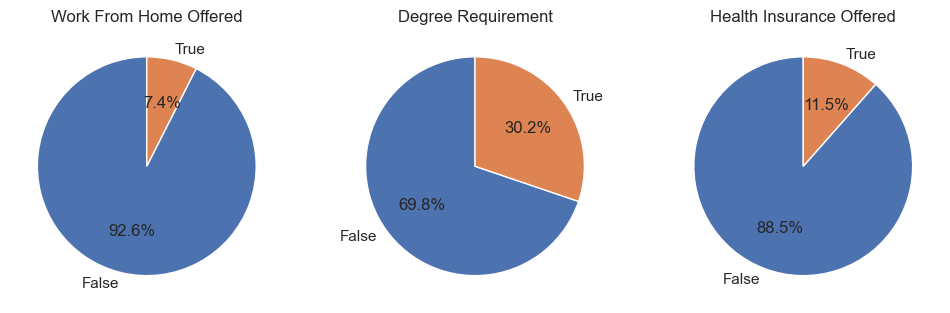

In [37]:
df_dict = {'job_work_from_home': 'Work From Home Offered',
           'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'}

fig,ax = plt.subplots(1,3)
fig.set_size_inches((12, 5))

for i , (column,title) in enumerate(df_dict.items()):
    ax[i].pie(df_Africa[column].value_counts(),labels =['False','True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)



plt.show


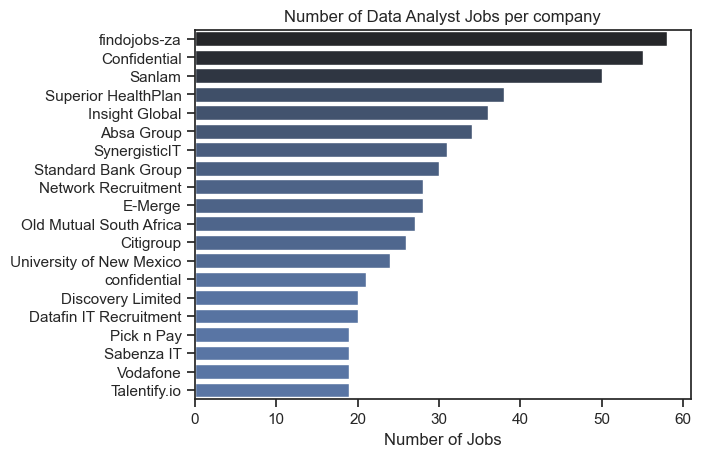

In [38]:
df_companies = df_Africa['company_name'].value_counts().head(20).to_frame()
sns.barplot(data= df_companies,x='count',y='company_name',hue='count',palette='dark:b_r',legend = None)
sns.set_style('ticks')
sns.despine
plt.title('Number of Data Analyst Jobs per company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

